In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import scipy.constants as const

mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Auswertung F43: Ramman-Spektroskopie

We measure the voltage of a Photodiode as at different angles of the .... 
There seem to be inconsistencies regarding the laser, dropping considerably in intensity.

In [13]:
angles = np.array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 12.5, 11.5, 12.25,  12.35, 12.15, 
                   10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 359, 358, 357, 356, 355, 354, 353, 340, 345, 347, 
                   350, 351, 350.5, 350.25, 350.6, 350.35, 351.5, 352, 349, 348, 330,100, 200, 75,50,
                   150, 275, 230, 300, 320]) # degrees
voltage = np.array([10.60, 10.44, 10.44, 10.30, 10.41, 10.27, 10.5, 9.60, 4.42, 2.65, 8.91, 
                    3.32, 7.80, 7.83, 6.46, 1.85, 1.82, 1.80, 1.79, 1.75, 1.75, 1.72, 1.73, 
                    1.67, 1.67, 1.67, 1.64, 1.57, 1.52, 1.48, 1.47, 1.46, 1.43, 8.80, 8.67, 8.46, 8.21, 
                    2.84, 5.63, 7.85, 4.15, 7.09, 1.35, 1.10, 7.98, 7.72, 6.79, 1.5, 7.10, 0.75, 5.20,
                    6.01, 1.92, 3.50, 1.29, 3.95]) # mV
# correct sign
voltage = - voltage

# set up pandas dataframe for storing data/easy sorting
data = pd.DataFrame()
data['angle'] = angles
data['voltage'] = voltage

# sort data by angle
data = data.sort_values(by='angle').reset_index(drop=True)
# wrap values above 180 to to negative, such that 359 equiv to -1
mask = data['angle'] > 180
data.loc[mask, 'angle'] = data.loc[mask, 'angle'] - 360



In [14]:
plt.scatter(data['angle'], data['voltage'])
plt.xlabel('Angle (degrees)')
plt.ylabel('Voltage (mV)')
plt.xlim(-12, -5)

(-12.0, -5.0)

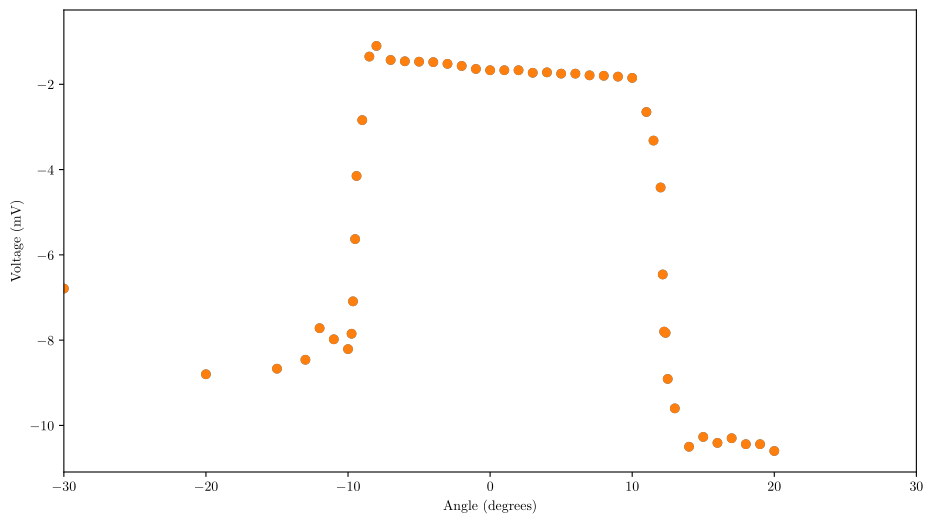

In [15]:
%matplotlib inline
plt.scatter(data['angle'], data['voltage'])
plt.xlabel('Angle (degrees)')
plt.ylabel('Voltage (mV)')
plt.xlim(-30, 30)
plt.show()

In [16]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost

# looking at the first transition
mask1 = (data['angle'] > 9) & (data['angle'] < 15)

# continue with minuit somehow TODO
inx_i = 40
inx_f = 49
deg_fit = data["angle"][inx_i: inx_f]
u_fit = data['voltage'][inx_i: inx_f]
sigma = 0.03*np.ones_like(u_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t1*x +t0

chi_2 = cost.LeastSquares(deg_fit, u_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=0, t1=0.58)
minuit.migrad()
t0_1, t1_1 = minuit.values['t0'], minuit.values['t1']
minuit.minos()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.448e+04 (χ²/ndof = 2068.3)│              Nfcn = 59               │
│ EDM = 6.02e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │   22.72   │   0.12    │   -0.12    │    0.12    │         │         │       │
│ 1 │ t1   │   2.957   │   0.012   │   -0.012   │   0.012    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.12   │   0.12    │  -0.012   │   0.012   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────┐
│    │       t0       t1 │
├────┼───────────────────┤
│ t0 │   0.0133  1.40e-3 │
│ t1 │  1.40e-3 0.000149 │
└────┴───────────────────┘

In [17]:
inx_i1 = 10
inx_f1 = 20
deg_fit = data["angle"][inx_i1: inx_f1]
u_fit = data['voltage'][inx_i1: inx_f1]
sigma = 0.03*np.ones_like(u_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t1*x +t0

chi_2 = cost.LeastSquares(deg_fit, u_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=0, t1=0.58)
minuit.migrad()
t0_2, t1_2 = minuit.values['t0'], minuit.values['t1']
minuit.minos()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.347e+04 (χ²/ndof = 1683.6)│              Nfcn = 63               │
│ EDM = 9.91e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │   25.36   │   0.11    │   -0.11    │    0.11    │         │         │       │
│ 1 │ t1   │  -2.624   │   0.009   │   -0.009   │   0.009    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.11   │   0.11    │  -0.009   │   0.009   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────┐
│    │       t0       t1 │
├────┼───────────────────┤
│ t0 │   0.0124 -1.02e-3 │
│ t1 │ -1.02e-3 8.45e-05 │
└────┴───────────────────┘

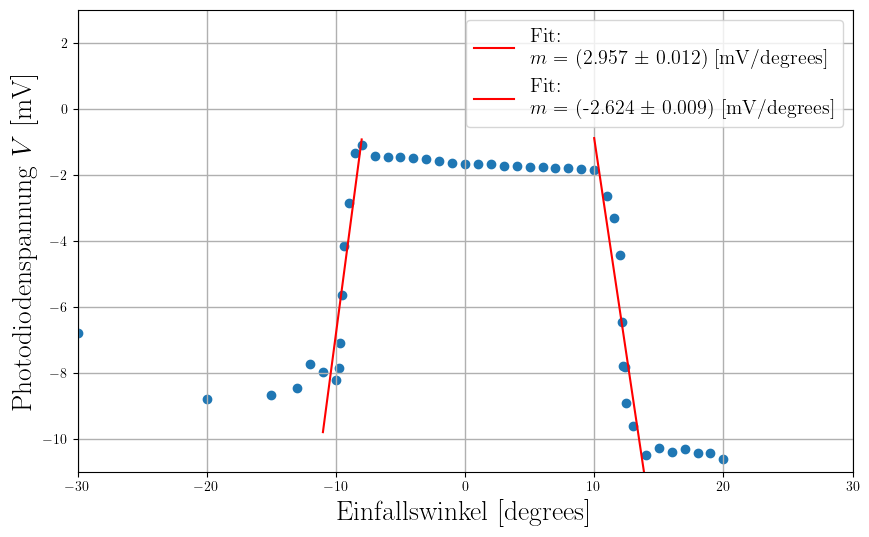

In [18]:
fig,ax = plt.subplots(figsize = (10, 6))
plt.grid(visible = True, which = 'major', linewidth=1.0)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)

plt.scatter(data['angle'], data['voltage'])
plt.plot(data['angle'][inx_i:inx_f],linear(data['angle'][inx_i:inx_f], t0_1, t1_1), color = 'red',
        label = 'Fit: \n $m$ = ({:.3f} $\pm$ 0.012) [mV/degrees]'.format(t1_1))
plt.plot(data['angle'][inx_i1:inx_f1],linear(data['angle'][inx_i1:inx_f1], t0_2, t1_2), color = 'red', 
        label = 'Fit: \n $m$ = ({:.3f} $\pm$ 0.009) [mV/degrees]'.format(t1_2))
plt.xlabel('Einfallswinkel [degrees]', fontsize = 20)
plt.ylabel('Photodiodenspannung $V$ [mV]', fontsize = 20)
plt.legend(fontsize='x-large', loc = 'best')
plt.xlim(-30, 30)
plt.ylim(-11,3)
plt.show()

As a next step we meuarese the voltace characteristic of the Photomultiplier. For this purpouse, we pump vacuum into the gas-cell and vary the applied voltage, i.e. current, and measure the counts for three minuts. We note the mean value of the measured counts and their standart deviation. During the measurements, the preasure of the cell is $p = (30\pm 5)$ mbar. 

In [19]:
u_in = np.array([1299, 1349,1400,1450,1500,1549,1600,1650,1699,1751,1801,1850,1900,1950,2000]) #V
i_in = np.array([.095, 0.099,0.102,.106,.110,.113,0.117,.120,.124,.128,.131,.135,.139,.142,.146,0.136]) #mA
count = np.array([0,0,0,0.10,0.5,2.30,4.0,6.60,24.90,95.90,222.20,380.70,1319.20,1683.6,969])
dcount= np.array([0,0,0,0.32,0.71,2.0,1.94,2.17,4.58,7.87,14.19,22.76,46.38,37.05,22.44]) #
np.sort(u_in)
np.sort(i_in)


array([0.095, 0.099, 0.102, 0.106, 0.11 , 0.113, 0.117, 0.12 , 0.124,
       0.128, 0.131, 0.135, 0.136, 0.139, 0.142, 0.146])

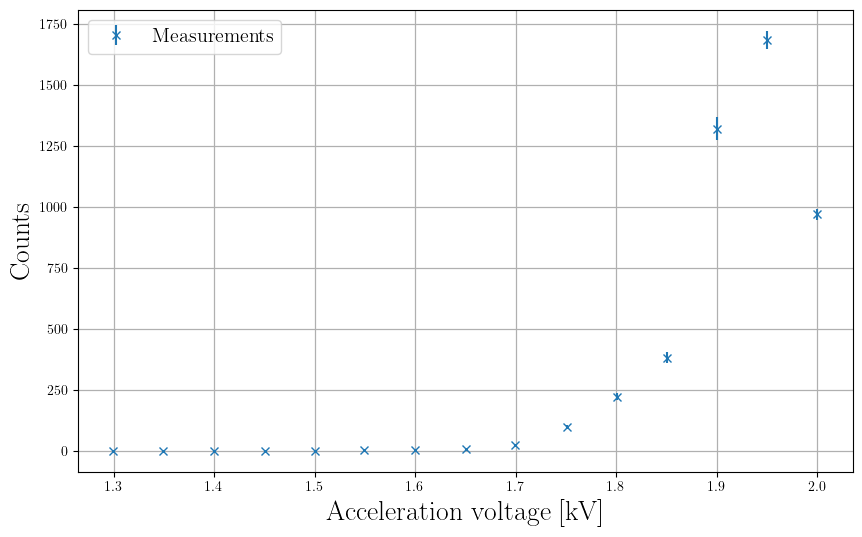

In [20]:
fig,ax = plt.subplots(figsize = (10, 6))
plt.grid(visible = True, which = 'major', linewidth=0.9)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)
plt.errorbar(u_in/1000, count, dcount, label="Measurements", linestyle = 'None', fmt='x')
plt.xlabel('Acceleration voltage [kV]', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.legend(fontsize='x-large', loc = 'best')
plt.show()

From the last three measurement we could notice strong deviations from the expected shape of the voltage characteristics. After a carefule look at the laser, our tutor could determine that the laser had major issues. For this reason the next parts of the experiment will be studied with old measurements. 

We start by plotting the current characteristic. 

In [21]:
U3=np.array([1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000,2050])#V
U3_err=np.ones(len(U3))*0.5#V
Rate=np.array([3.22,2.60,8.30,18.90,145.6,1822.1,9693.6,25885,
    51397.6,78234.1,101675.8,118372.7])
Rate_err=np.array([1.66,1.51,2.31,3.45,14.57,37.54,82.43,193.9,184.92,
  409.37,327.07,473.9])

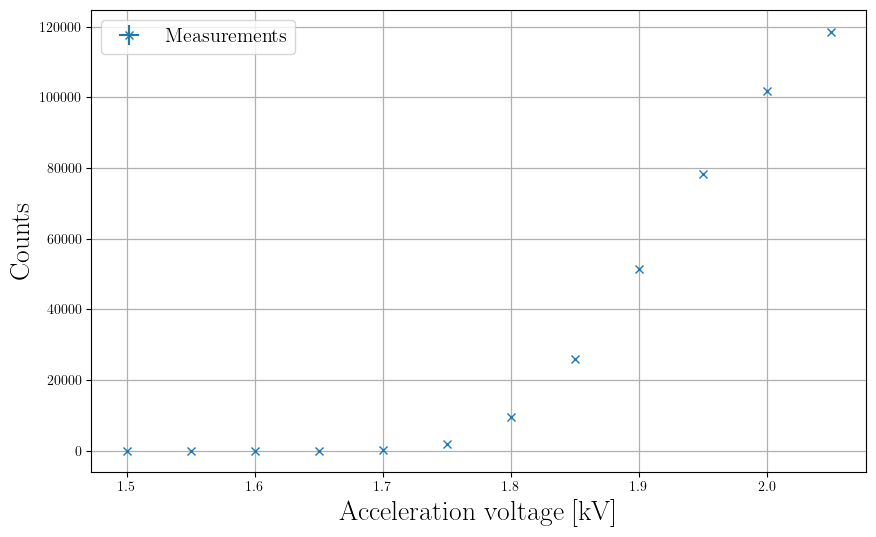

In [22]:
fig,ax = plt.subplots(figsize = (10, 6))
plt.grid(visible = True, which = 'major', linewidth=0.9)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)
plt.errorbar(U3/1000, Rate, xerr = U3_err/1000, yerr=Rate_err, label="Measurements", linestyle = 'None', fmt='x')
plt.xlabel('Acceleration voltage [kV]', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.legend(fontsize='x-large', loc = 'best')
plt.show()

From the response of the Photomultiplier we try to find a 'good' accelearation voltage. For this we choose a voltage, for which the change in count is maximised, ie. the strongest gradient of the curve around $\left(1925 \pm10\right)V$

### Deuterium Measurements

In [23]:
# importing deuterium data
D2_data = pd.read_csv("D2.txt", sep='\t', decimal=',', header=None)
D2_Underground_data = pd.read_csv("D2_Untergrund.txt", sep='\t',decimal=',', header=None)
D2_data.columns = ["a", "b", "wavelength", "counts"]
D2_Underground_data.columns = ["a", "b", "wavelength", "counts"]

D2_data["wavenumber"] = 1/D2_data["wavelength"]
D2_Underground_data["wavenumber"] = 1/D2_Underground_data["wavelength"]
# converting wavenumber to cm^-1
D2_data["wavenumber"] = D2_data["wavenumber"]*10**7
D2_Underground_data["wavenumber"] = D2_Underground_data["wavenumber"]*10**7
D2_data["count"] = D2_data["counts"] - D2_Underground_data["counts"]


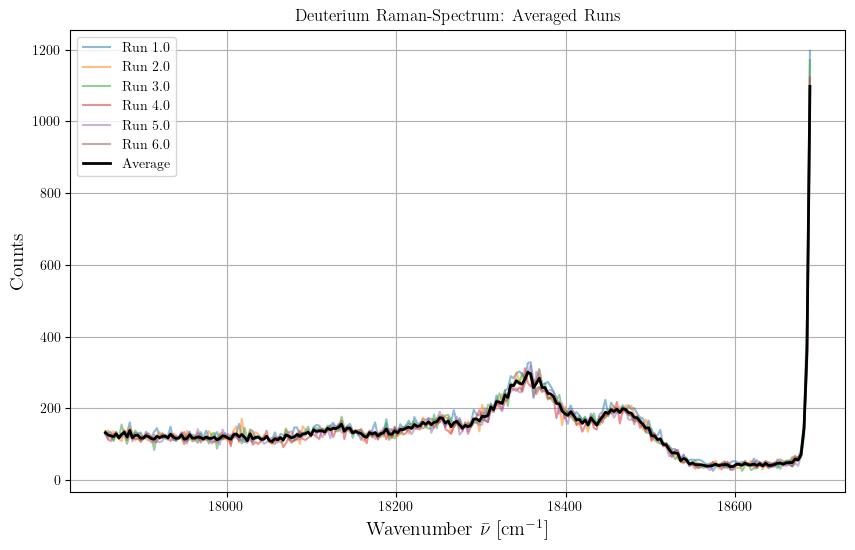

In [24]:
# Group data by wavenumber and average the counts across all 'a' values
data = D2_data.groupby("wavenumber", as_index=False)["counts"].mean()
dataEr = D2_Underground_data.groupby("wavenumber", as_index=False)["counts"].mean()

data['count'] = data['counts'] - dataEr['counts']

# Plot the individual runs and the averaged data
fig = plt.figure(figsize=(10, 6))

# Plot data for each series 'a'
for a in D2_data['a'].unique():
    mask = D2_data['a'] == a
    plt.plot(D2_data['wavenumber'][mask], D2_data['counts'][mask], alpha=0.5, label=f"Run {a}")


# Plot the averaged data
plt.plot(data["wavenumber"], data["counts"], color="black", linewidth=2, label="Average")

# Add plot details
plt.title("Deuterium Raman-Spectrum: Averaged Runs")
plt.xlabel(r"Wavenumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.legend()
plt.grid()
plt.show()


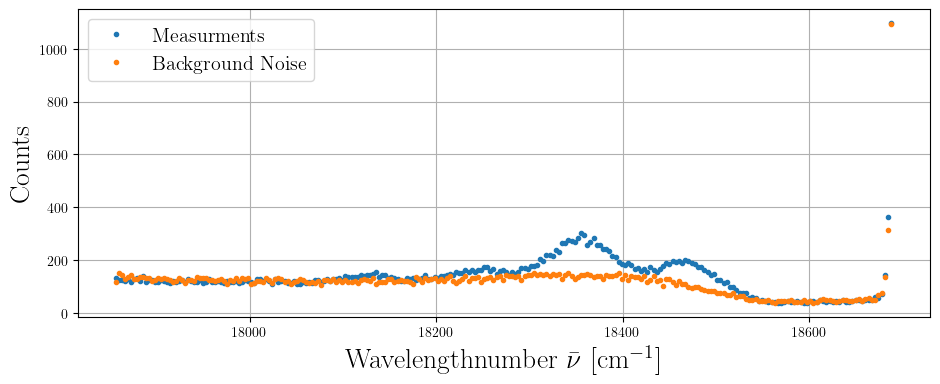

In [25]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(data["wavenumber"], data["counts"],label="Measurments", 
             linestyle='None', fmt='.')
plt.errorbar(dataEr["wavenumber"], dataEr["counts"],
             label="Background Noise", linestyle='None', fmt='.')

plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)


plt.show()

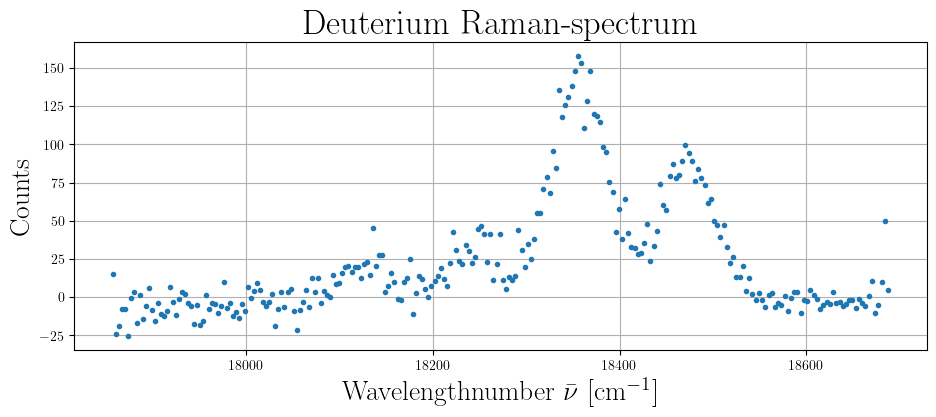

In [26]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(data["wavenumber"], data["count"], 
             linestyle='None', fmt='.')

#plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.title("Deuterium Raman-spectrum", fontsize=25)
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)

#plt.ylim(-0.10,200)
#plt.xlim(537,560)
plt.show()

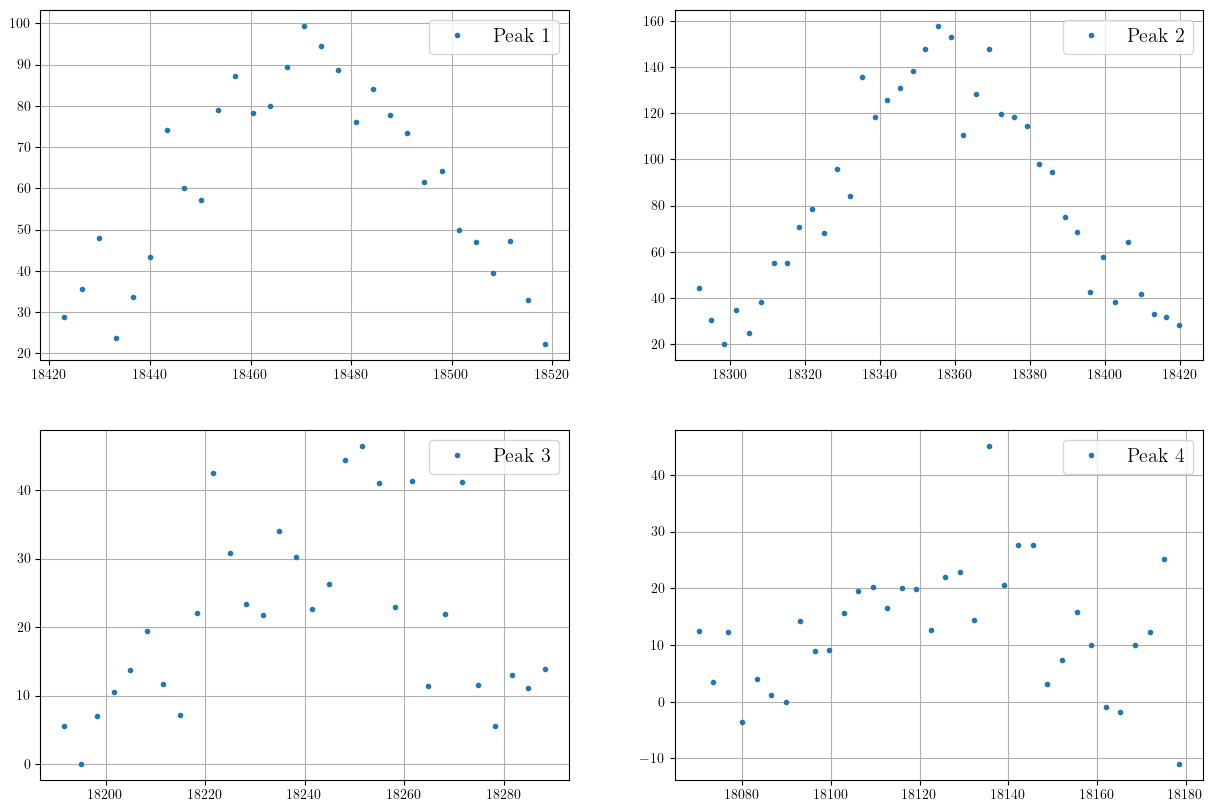

In [27]:
# defining peak ranges
peak1 = data[(data["wavenumber"] > 18422) & (data["wavenumber"] < 18520)]
peak2 = data[(data["wavenumber"] > 18290) & (data["wavenumber"] < 18422)]
peak3 = data[(data["wavenumber"] > 18190) & (data["wavenumber"] < 18290)]
peak4 = data[(data["wavenumber"] > 18070) & (data["wavenumber"] < 18180)]
# making suobplots for all of the peaks
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].errorbar(peak1["wavenumber"], peak1["count"],
                    label="Peak 1", linestyle='None', fmt='.')
ax[0,1].errorbar(peak2["wavenumber"], peak2["count"],
                    label="Peak 2", linestyle='None', fmt='.')
ax[1,0].errorbar(peak3["wavenumber"], peak3["count"], 
                    label="Peak 3", linestyle='None', fmt='.')
ax[1,1].errorbar(peak4["wavenumber"], peak4["count"],
                    label="Peak 4", linestyle='None', fmt='.')
ax[0,0].legend(fontsize='x-large', loc='best')
ax[1,0].legend(fontsize='x-large', loc='best')
ax[0,1].legend(fontsize='x-large', loc='best')
ax[1,1].legend(fontsize='x-large', loc='best')
ax[0,0].grid()
ax[1,0].grid()
ax[0,1].grid()
ax[1,1].grid()

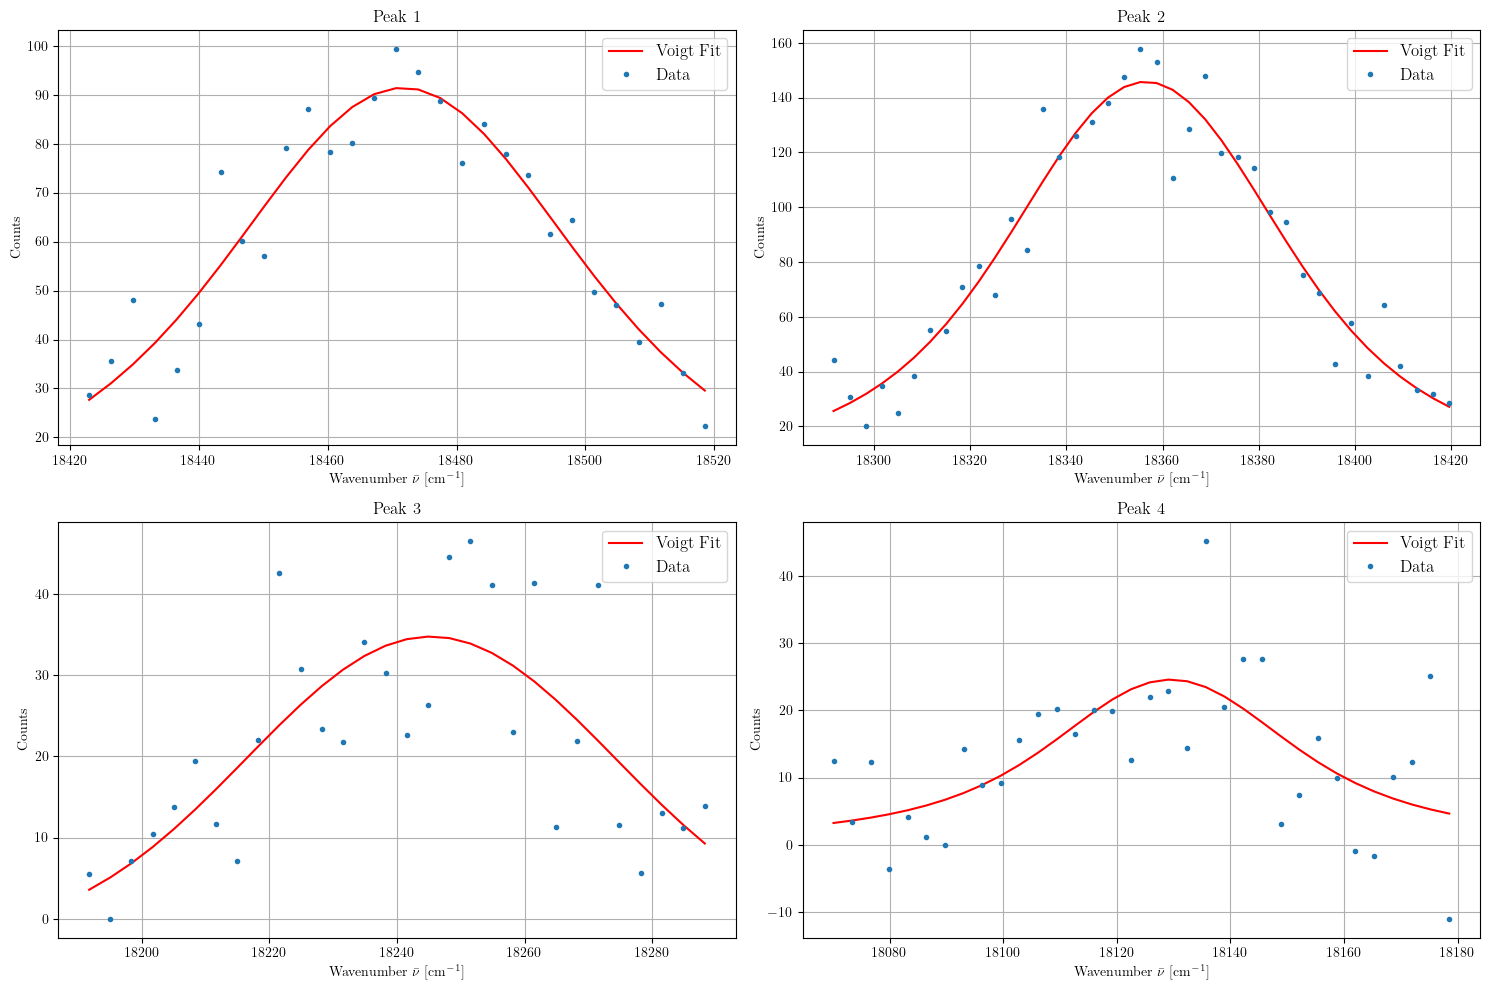

Fitted Voigt Parameters:
Peak 1: Amplitude=8943.20, Center=18471.74 cm⁻¹, Sigma=14.13, Gamma=25.53
Peak 2: Amplitude=14017.68, Center=18356.51 cm⁻¹, Sigma=16.86, Gamma=22.83
Peak 3: Amplitude=1980.30, Center=18245.30 cm⁻¹, Sigma=32.75, Gamma=-13.57
Peak 4: Amplitude=1849.53, Center=18129.50 cm⁻¹, Sigma=9.99, Gamma=20.26


In [28]:
from scipy.special import wofz
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Voigt profile function
def voigt(x, A, x0, sigma, gamma):
    z = ((x - x0) + 1j * gamma) / (sigma * np.sqrt(2))
    return A * np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi))

# Fit the Voigt profile to the data
def fit_voigt(x_data, y_data, p0):
    popt, pcov = curve_fit(voigt, x_data, y_data, p0=p0, maxfev=50000)
    return popt, np.sqrt(np.diag(pcov))  # Return parameters and errors

# Updated initial guesses based on Gaussian fits
initial_guesses_voigt = [
    [89.39, 18471.69, 29.98, 5],  # Peak 1
    [141.12, 18356.58, 31.61, 5], # Peak 2
    [35.56, 18245.86, 25.11, 5],  # Peak 3
    [23.43, 18128.60, 24.34, 5],  # Peak 4
]

# Fit each peak with the Voigt profile
popt1, perr1 = fit_voigt(peak1["wavenumber"], peak1["count"], initial_guesses_voigt[0])
popt2, perr2 = fit_voigt(peak2["wavenumber"], peak2["count"], initial_guesses_voigt[1])
popt3, perr3 = fit_voigt(peak3["wavenumber"], peak3["count"], initial_guesses_voigt[2])
popt4, perr4 = fit_voigt(peak4["wavenumber"], peak4["count"], initial_guesses_voigt[3])

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Peak 1
ax[0,0].errorbar(peak1["wavenumber"], peak1["count"], label="Data", linestyle='None', fmt='.')
ax[0,0].plot(peak1["wavenumber"], voigt(peak1["wavenumber"], *popt1), label="Voigt Fit", color="red")
ax[0,0].legend(fontsize='large')
ax[0,0].set_title("Peak 1")

# Peak 2
ax[0,1].errorbar(peak2["wavenumber"], peak2["count"], label="Data", linestyle='None', fmt='.')
ax[0,1].plot(peak2["wavenumber"], voigt(peak2["wavenumber"], *popt2), label="Voigt Fit", color="red")
ax[0,1].legend(fontsize='large')
ax[0,1].set_title("Peak 2")

# Peak 3
ax[1,0].errorbar(peak3["wavenumber"], peak3["count"], label="Data", linestyle='None', fmt='.')
ax[1,0].plot(peak3["wavenumber"], voigt(peak3["wavenumber"], *popt3), label="Voigt Fit", color="red")
ax[1,0].legend(fontsize='large')
ax[1,0].set_title("Peak 3")

# Peak 4
ax[1,1].errorbar(peak4["wavenumber"], peak4["count"], label="Data", linestyle='None', fmt='.')
ax[1,1].plot(peak4["wavenumber"], voigt(peak4["wavenumber"], *popt4), label="Voigt Fit", color="red")
ax[1,1].legend(fontsize='large')
ax[1,1].set_title("Peak 4")

# Add grid and labels
for i in range(2):
    for j in range(2):
        ax[i, j].grid()
        ax[i, j].set_xlabel(r"Wavenumber $\bar{\nu}$ [cm$^{-1}$]")
        ax[i, j].set_ylabel("Counts")

plt.tight_layout()
plt.show()

# Print the fit parameters for all peaks
print("Fitted Voigt Parameters:")
for i, popt in enumerate([popt1, popt2, popt3, popt4], start=1):
    print(f"Peak {i}: Amplitude={popt[0]:.2f}, Center={popt[1]:.2f} cm⁻¹, Sigma={popt[2]:.2f}, Gamma={popt[3]:.2f}")


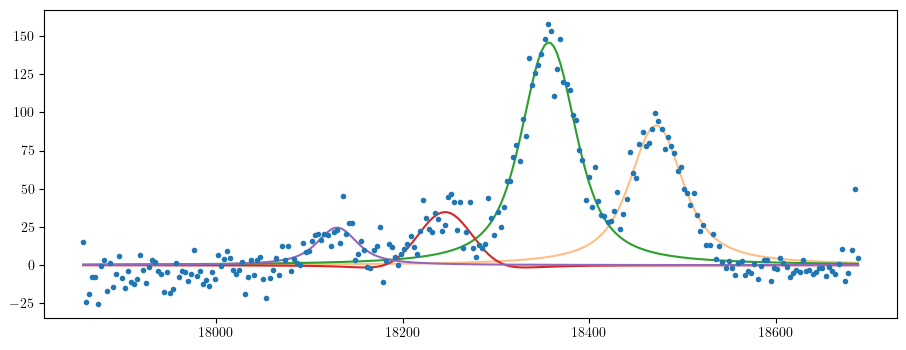

In [29]:
# plot of the entire spectrum with fits
fig = plt.figure(figsize=(11,4))
plt.errorbar(data["wavenumber"], data["count"], 
             linestyle='None', fmt='.')
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt1), label="Peak 1", alpha=0.5)
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt2), label="Peak 2")
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt3), label="Peak 3")
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt4), label="Peak 4")

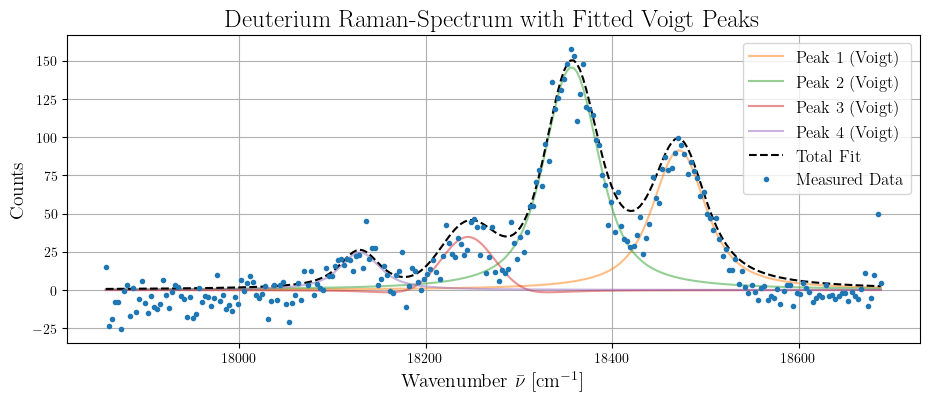

     peak        center  gaussian_width  lorentzian_width     intensity
0  Peak 1  18471.735728       14.129902         25.533174   8943.199158
1  Peak 2  18356.508250       16.860992         22.829382  14017.682264
2  Peak 3  18245.302397       32.746399        -13.569644   1980.304864
3  Peak 4  18129.503994        9.991488         20.261601   1849.532082


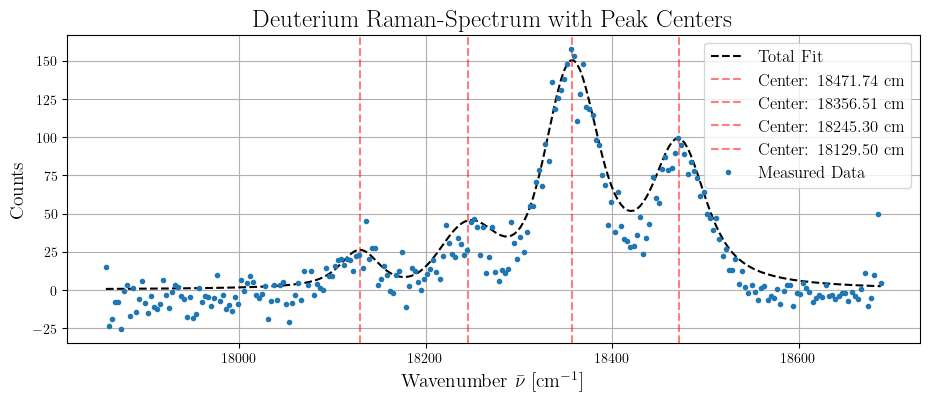

In [30]:
# Total Voigt fit for the entire spectrum
total_fit = (
    voigt(data["wavenumber"], *popt1) +
    voigt(data["wavenumber"], *popt2) +
    voigt(data["wavenumber"], *popt3) +
    voigt(data["wavenumber"], *popt4)
)

# Plot individual Voigt fits and the measured spectrum
fig = plt.figure(figsize=(11, 4))
plt.errorbar(data["wavenumber"], data["count"], linestyle='None', fmt='.', label="Measured Data")

plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt1), label="Peak 1 (Voigt)", alpha=0.5)
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt2), label="Peak 2 (Voigt)", alpha=0.5)
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt3), label="Peak 3 (Voigt)", alpha=0.5)
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt4), label="Peak 4 (Voigt)", alpha=0.5)

# Plot the total fit
plt.plot(data["wavenumber"], total_fit, label="Total Fit", color='black', linestyle='--')

# Add legend, labels, and grid
plt.legend(fontsize='large')
plt.title("Deuterium Raman-Spectrum with Fitted Voigt Peaks", fontsize=18)
plt.xlabel(r"Wavenumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid()
plt.show()

# Extract Voigt fit parameters for each peak
peak_info = {
    "peak": ["Peak 1", "Peak 2", "Peak 3", "Peak 4"],
    "center": [popt1[1], popt2[1], popt3[1], popt4[1]],
    "gaussian_width": [popt1[2], popt2[2], popt3[2], popt4[2]],
    "lorentzian_width": [popt1[3], popt2[3], popt3[3], popt4[3]],
    "intensity": [popt1[0], popt2[0], popt3[0], popt4[0]],
}

# Create and display DataFrame
peak_df = pd.DataFrame(peak_info)
print(peak_df)

# Plot with vertical lines for peak center positions
fig = plt.figure(figsize=(11, 4))
plt.errorbar(data["wavenumber"], data["count"], linestyle='None', fmt='.', label="Measured Data")

# Plot the total fit
plt.plot(data["wavenumber"], total_fit, label="Total Fit", color='black', linestyle='--')

# Add vertical lines for peak centers
for center in peak_df["center"]:
    plt.axvline(center, color='red', linestyle='--', alpha=0.5, label=f"Center: {center:.2f} cm")

# Avoid duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize='large')

# Add labels and grid
plt.title("Deuterium Raman-Spectrum with Peak Centers", fontsize=18)
plt.xlabel(r"Wavenumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid()
plt.show()


In [31]:
def B(mu, r):
    h = const.Planck
    c = const.speed_of_light
    temp = h/(8*np.pi**2*c*mu*r**2)
    return temp

def pv_rot(B,J):
    return B*(4*J+6)


In [36]:
m_D = const.atomic_mass * 2.014  # Mass of Deuterium atom (kg)
r_D2 = 0.74e-12  # Bond length for D2 in meters (~0.74 Angstrom)

# Reduced mass for Deuterium molecule
mu_D2 = (m_D * m_D) / (m_D + m_D)

# Calculate rotational constant B in cm^-1
B_D2 = B(mu_D2, r_D2)* 10e-2 / const.c  # Convert to cm^-1 (1 m = 100 cm)

# Rotational quantum numbers J
J = np.arange(0, 7, 1)

# Calculate rotational transition energies
rot_energies = pv_rot(B_D2, J)

# Print results
print(f"Rotational constant B for Deuterium (D2): {B_D2:.4f} cm⁻¹\n")
print("Rotational Transition Energies (Delta J = 2):")
for j, energy in zip(J, rot_energies):
    print(f"J = {j} -> J+2: {energy:.4f} cm^{-1}")



Rotational constant B for Deuterium (D2): 0.0102 cm⁻¹

Rotational Transition Energies (Delta J = 2):
J = 0 -> J+2: 0.0612 cm^-1
J = 1 -> J+2: 0.1020 cm^-1
J = 2 -> J+2: 0.1428 cm^-1
J = 3 -> J+2: 0.1836 cm^-1
J = 4 -> J+2: 0.2243 cm^-1
J = 5 -> J+2: 0.2651 cm^-1
J = 6 -> J+2: 0.3059 cm^-1
